## Rana-Roop Singh Bhullar

## Computer Assignment 05 - Logistic Regression

In [29]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Package for encoding
from sklearn.preprocessing import LabelEncoder
# Import scikit.learn to use test and training function
from sklearn.model_selection import train_test_split
# Package for LR Model
from sklearn.linear_model import LogisticRegression
# Packages for performance model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [30]:
# Read the data using URL
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [31]:
# Check of data was read correctly
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [32]:
cvd.tail()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


### Data Quality Analysis

In [33]:
# Display the range, column, non-null count, data type and memory usage
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [34]:
# Double check null values in the columns
cvd.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [35]:
cvd.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


### Part 1: Binary Classifier Model ~ Logistic Regression

In [36]:
cvd.groupby('cvd_4types').mean()

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,,,,,,,,,,,,,,,,
0,63.716328,1.156509,2.281415,1.454477,105.176915,37.050640,93.896892,82.393980,12.005719,0.473288,0.287434,0.045147,2.481565,2.319037,4.265613,3.957863
1,65.601673,1.051751,2.357554,1.308939,105.563170,37.898134,99.511521,83.329378,13.528071,0.401464,0.355985,0.083116,2.468374,2.255097,4.311553,3.800314


In [37]:
# Confirming to see if the dataset is balanced
cvd.cvd_4types.value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

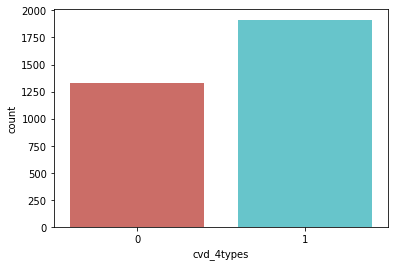

In [38]:
# Visualization of the balanced dataset
sns.countplot(x='cvd_4types', data=cvd, palette='hls')
plt.show()

Splitting into training and test

In [39]:
# Identify our column names
cvd.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [40]:
# x will is the independent variables
# we are trying to predict y, which will be our independent variable

x = cvd[['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab','bend25', 'happy25', 'tired25', 'hlthlm25']]
y = cvd['cvd_4types']

In [41]:
# Splitting it into test and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [42]:
# Inserting into the model
# Source https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression(penalty = 'l2', solver='liblinear', C=1, random_state=101)
fit_model = model.fit(x_train, y_train)
y_pred = fit_model.predict(x_test)

### Part 2: Display the Feature Importance on CVD Risk

In [43]:
feature_cvd = pd.DataFrame({'feature':list(x_train.columns), 'feature_cvd':[abs(i) for i in model.coef_[0]]})
feature_cvd.sort_values('feature_cvd', ascending = False)

,feature,feature_cvd
1,race,0.883611
15,hlthlm25,0.561437
11,parrptdiab,0.541506
2,educat,0.310915
14,tired25,0.126422
3,mstat,0.122914
12,bend25,0.116301
10,srhype,0.105461
6,waist,0.073628
13,happy25,0.051989


On the table above, we can see the most impactful features that causes CVD risk. Race is number one. The second highest feature is "hlthlm25" which is the frequency that physical health or emotional problems interfered with normal social activities. 
Source: https://sleepdata.org/datasets/shhs/variables

### Part 3: Evaluate the Performace of my model

auc_score: 0.6660340285874682
F1_Score: 0.7576736672051696


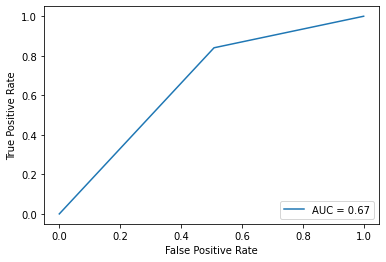

In [44]:
#AUC Score
auc_score = roc_auc_score(y_test, y_pred)
# F1 Score
F1 = f1_score(y_test, y_pred)

print('auc_score:', auc_score)
print('F1_Score:', F1)

# Creating points for ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
# Setting AUC to a variable
auc_score = metrics.auc(fpr, tpr)
# Plotting the ROC Curve and returning a visualization
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)
display.plot()
plt.show()

Explanation and conclusion from the performance of my model will be in a word document attached in the repository.